# Import des librairies

In [131]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid") # Set a default seaborn style
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA

# Chargement des données

In [132]:
# Chargons les données de consommation d'énergie à notre disposition
data_ = pd.read_excel("donnees/dataset-cassou-ok.xlsx")
data_cassou = pd.read_excel("donnees/dataset-cassou-ok.xlsx")
data_kirsi = pd.read_excel("donnees/dataset-kirsi-ok.xlsx")
data_koumbili = pd.read_excel("donnees/dataset-koumbili-ok.xlsx")
data_la_todin = pd.read_excel("donnees/dataset-la-todin-ok.xlsx")
data_raka = pd.read_excel("donnees/dataset-raka-ok.xlsx")
data_rambo = pd.read_excel("donnees/dataset-rambo-ok.xlsx")
data_sielle = pd.read_excel("donnees/dataset-sielle-ok.xlsx")
data_tangaye = pd.read_excel("donnees/dataset-tangaye-ok.xlsx")
data_tanlarghin = pd.read_excel("donnees/dataset-tanlarghin-ok.xlsx")
data_tikare = pd.read_excel("donnees/dataset-tikare-ok.xlsx")
data_torla = pd.read_excel("donnees/dataset-torla-ok.xlsx")
data_vousnangou = pd.read_excel("donnees/dataset-vousnangou-ok.xlsx")

In [133]:
data_.head()

,BASE DE DONNEES DES CONSOMMATIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Nom complet du client,Période,Période en Mois Années,Type de compteur,puissance du compteur,Nom de l'opérateur,Numéro de série,Nombre d'unité,Unité,Localité
1,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
2,CASSOU LYCEE DEPARTEMENTAL,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455974,140,KWH,CASSOU
3,PERCEPTION CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455917,50,KWH,CASSOU
4,INSPECTION CEB1,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455867,74,KWH,CASSOU


In [134]:
# Affichons les données manquantes
data_.describe()

,BASE DE DONNEES DES CONSOMMATIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
count,1786,1786,1786,1786,1786,1786,1786,1786,1786,1786
unique,273,16,16,3,6,4,273,274,2,2
top,JEAN TOGO,2022-05-01 to 2022-06-01,Mai 2022,MONOPHASE,3,PPI,25112465759,20,KWH,CASSOU
freq,28,191,191,1760,1073,1580,15,167,1785,1785


On constate que les colonnes Unnamed 10, 11, 12 et 13 sont vides
On peut donc les supprimer

In [135]:
# Créons une fonction pour renommer les colonnes
def renomme_colonne(df):
    df =df.rename(columns = {'BASE DE DONNEES DES CONSOMMATIONS': 'Customer full name', 
                       'Unnamed: 1': 'Period', 
                       'Unnamed: 2': 'Period in Months Years',
                      'Unnamed: 3': 'Meter type',
                      'Unnamed: 4': 'Meter power',
                      'Unnamed: 5': 'Operator name',
                      'Unnamed: 6': 'Serial number',
                      'Unnamed: 7': 'Energy consumption',
                      'Unnamed: 8': 'Unit',
                      'Unnamed: 9': 'Locality'})
    return df

In [136]:
# Renommons les colonnes 
data_cassou = renomme_colonne(data_cassou)
data_kirsi = renomme_colonne(data_kirsi)
data_koumbili = renomme_colonne(data_koumbili) 
data_la_todin = renomme_colonne(data_la_todin)
data_raka = renomme_colonne(data_raka)
data_rambo = renomme_colonne(data_rambo)
data_sielle = renomme_colonne(data_sielle) 
data_tangaye = renomme_colonne(data_tangaye)
data_tanlarghin = renomme_colonne(data_tanlarghin) 
data_tikare = renomme_colonne(data_tikare) 
data_torla = renomme_colonne(data_torla)
data_vousnangou = renomme_colonne(data_vousnangou)

In [137]:
# Supprimons la ligne 0
data_cassou = data_cassou.drop(0)
data_kirsi = data_kirsi.drop(0)
data_koumbili = data_koumbili.drop(0) 
data_la_todin = data_la_todin.drop(0)
data_raka = data_raka.drop(0)
data_rambo = data_rambo.drop(0)
data_sielle = data_sielle.drop(0) 
data_tangaye = data_tangaye.drop(0)
data_tanlarghin = data_tanlarghin.drop(0) 
data_tikare = data_tikare.drop(0) 
data_torla = data_torla.drop(0)
data_vousnangou = data_vousnangou.drop(0)

data_ = data_.drop(0)

In [138]:
data_.head()

,BASE DE DONNEES DES CONSOMMATIONS,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
1,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
2,CASSOU LYCEE DEPARTEMENTAL,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455974,140,KWH,CASSOU
3,PERCEPTION CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455917,50,KWH,CASSOU
4,INSPECTION CEB1,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455867,74,KWH,CASSOU
5,PENSION KOUYEN DIASSO 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455891,36,KWH,CASSOU


### Identifions le type des variables

In [139]:
#data_['Consommation'] = data_['Consommation'].astype(int)

data_cassou['Energy consumption'] = data_cassou['Energy consumption'].astype(int)
data_kirsi['Energy consumption'] = data_kirsi['Energy consumption'].astype(int)
data_koumbili['Energy consumption'] = data_koumbili['Energy consumption'].astype(int)
data_la_todin['Energy consumption'] = data_la_todin['Energy consumption'].astype(int)
data_raka['Energy consumption'] = data_raka['Energy consumption'].astype(int)
data_rambo['Energy consumption'] = data_rambo['Energy consumption'].astype(int)
data_sielle['Energy consumption'] = data_sielle['Energy consumption'].astype(int) 
data_tangaye['Energy consumption'] = data_tangaye['Energy consumption'].astype(int)
data_tanlarghin['Energy consumption'] = data_tanlarghin['Energy consumption'].astype(int)
data_tikare['Energy consumption'] = data_tikare['Energy consumption'].astype(int)
data_torla['Energy consumption'] = data_torla['Energy consumption'].astype(int)
data_vousnangou['Energy consumption'] = data_vousnangou['Energy consumption'].astype(int)

### Concaténons les dataframes 

In [140]:
data_ = pd.concat([data_cassou], ignore_index = True)

#data_ = pd.concat([data_cassou, data_kirsi, data_koumbili,
 #                  data_la_todin, data_raka, data_rambo,
  #                 data_sielle, data_tangaye, data_tanlarghin,
   #                data_tikare, data_torla, data_vousnangou], ignore_index = True)

data_

,Customer full name,Period,Period in Months Years,Meter type,Meter power,Operator name,Serial number,Energy consumption,Unit,Locality
0,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
1,CASSOU LYCEE DEPARTEMENTAL,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455974,140,KWH,CASSOU
2,PERCEPTION CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455917,50,KWH,CASSOU
3,INSPECTION CEB1,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455867,74,KWH,CASSOU
4,PENSION KOUYEN DIASSO 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455891,36,KWH,CASSOU
...,...,...,...,...,...,...,...,...,...,...
1780,CASSOU ATC,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,10,ABER,25700105932,7523,KWH,CASSOU
1781,JEAN TOGO,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,30,PPI,25700106013,10,KWH,CASSOU
1782,IBADOUIN DIASSO,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,30,PPI,25700210385,109,KWH,CASSOU
1783,ABED-RAZAK SIENOU,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,30,PPI,25700210377,330,KWH,CASSOU


# Visualisation des données

#### Nous nous intéressons dans un premier temps à la consommation d'énergie en fonction de la puissance du compteur

In [141]:
#On supprime les valeurs aberrantes
def fonc_supp_va(df_):
    #On calcule Q1
    q1=df_['Energy consumption'].quantile(q=0.25)
    #q1=np.percentile(df['Consommation'], 25, interpolation = 'midpoint')
    
    #On calcule Q3
    q3=df_['Energy consumption'].quantile(q=0.75)
    #q3=np.percentile(df['Consommation'], 75, interpolation = 'midpoint')
    
    #On calcule l'écart interquartile (IQR)
    IQR=q3-q1
    
    #On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
    borne_inf = q1-1.5*IQR
    #lower = np.where(df['Consommation']<=(q1-1.5*IQR))
    
    #On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
    borne_sup = q3 +1.5*IQR
    #upper = np.where(df['Consommation']>=(q3+1.5*IQR))
    
    #On garde les valeurs à l'intérieur de la borne inférieure et supérieure
    df_= df_[(df_['Energy consumption']<borne_sup) & (df_['Energy consumption']>borne_inf)]
    #df.drop(lower[0], inplace=True)
    #df.drop(upper[0], inplace=True)
    df_ = df_.reset_index(drop = True)
    return df_

In [173]:
data_new_3 = data_
data_new_5 = data_
data_new_10 = data_
data_new_15 = data_
data_new_30 = data_

In [174]:
i=0
for i in data_.index: 
    if(data_['Meter power'][i]!=3):
        data_new_3 = data_new_3.drop(i)
data_new_3 = fonc_supp_va(data_new_3)

In [183]:
data_new_5 = fonc_supp_va(data_new_5)

In [176]:
i=0
for i in data_.index: 
    if(data_['Meter power'][i]!=5):
        data_new_5 = data_new_5.drop(i)
data_new_5 = fonc_supp_va(data_new_5)

In [177]:
i=0
for i in data_.index: 
    if(data_['Meter power'][i]!=10):
        data_new_10 = data_new_10.drop(i)
data_new_10 = fonc_supp_va(data_new_10)

In [178]:
i=0
for i in data_.index: 
    if(data_['Meter power'][i]!=15):
        data_new_15 = data_new_15.drop(i)
data_new_15 = fonc_supp_va(data_new_15)

In [179]:
i=0
for i in data_.index: 
    if(data_['Meter power'][i]!=30):
        data_new_30 = data_new_30.drop(i)
data_new_30 = fonc_supp_va(data_new_30)

In [192]:
# Concaténation
data_ = pd.concat([data_new_3, data_new_5, data_new_10, data_new_15,
                   data_new_30], ignore_index = True)
#data_new_30 = data_
type(data_new_30)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Meter power', ylabel='Energy consumption'>

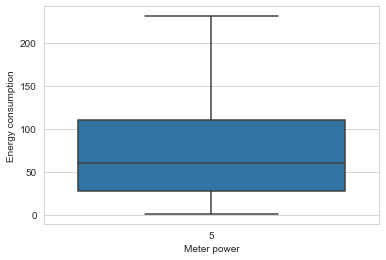

In [194]:
# Visualistaion avec boxplot

data_ = data_[(data_['Energy consumption']<300)]
sns.boxplot(x='Meter power',y='Energy consumption',data=data_new_5)

In [152]:
from scipy.stats import bartlett
bartlett(data_.Consommation[data_['Meter power'] == 3],
    data_.Consommation[data_['Meter power'] == 5],
    data_.Consommation[data_['Meter power'] == 10],
    data_.Consommation[data_['Meter power'] == 15],
    data_.Consommation[data_['Meter powerr'] == 30])

AttributeError: 'DataFrame' object has no attribute 'Consommation'

#### Consommation d'énergie en fonction du type de compteur

<AxesSubplot:xlabel='Meter type', ylabel='Energy consumption'>

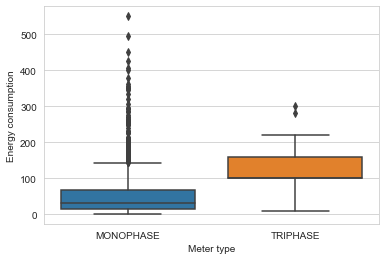

In [153]:
# Visualistaion avec boxplot
#df_ = encodage_type_compteur(data_)
sns.boxplot(x='Meter type',y='Energy consumption',data=data_)

C:\Users\USER\AppData\Local\Temp\ipykernel_20064\3930733095.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Customer full name'] = l_scaler.transform(df['Customer full name'].astype(str))
C:\Users\USER\AppData\Local\Temp\ipykernel_20064\3930733095.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Meter type'] = df['Meter type'].map(code)
C:\Users\USER\AppData\Local\Temp\ipykernel_20064\3930733095.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

<AxesSubplot:xlabel='Period in Months Years', ylabel='Energy consumption'>

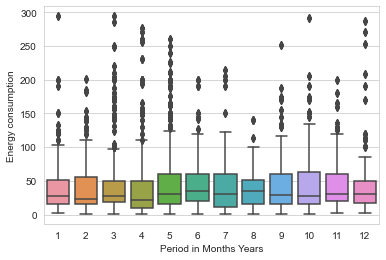

In [195]:
# Visualistaion avec boxplot
df_ = encodage_type_compteur(data_)
#sns.boxplot(x='Période en Mois Années',y='Consommation',data=df_)
sns.boxplot(x='Period in Months Years',y='Energy consumption',data=df_)

In [15]:
from scipy.stats import bartlett
bartlett(df_.Consommation[df_['Période en Mois Années'] == 1],
         df_.Consommation[df_['Période en Mois Années'] == 2],
         df_.Consommation[df_['Période en Mois Années'] == 3],
         df_.Consommation[df_['Période en Mois Années'] == 4],
         df_.Consommation[df_['Période en Mois Années'] == 5],
         df_.Consommation[df_['Période en Mois Années'] == 6],
         df_.Consommation[df_['Période en Mois Années'] == 7],
         df_.Consommation[df_['Période en Mois Années'] == 8],
         df_.Consommation[df_['Période en Mois Années'] == 9],
         df_.Consommation[df_['Période en Mois Années'] == 10],
         df_.Consommation[df_['Période en Mois Années'] == 11],
    df_.Consommation[df_['Période en Mois Années'] == 12])

NameError: name 'df_' is not defined

#### Consommation d'énergie en fonction de la localité

<AxesSubplot:xlabel='Localité', ylabel='Consommation'>

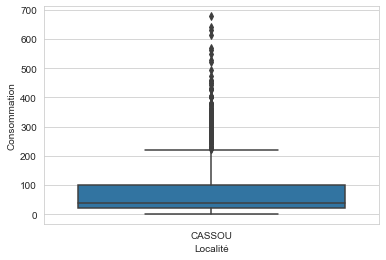

In [16]:
# Visualistaion avec boxplot
sns.boxplot(x='Localité',y='Consommation',data=data_)

# Pré-traitement des données

## Train - Test - Nettoyage - Encodage

In [165]:
df_ = data_

In [166]:
df_ = df_.reset_index()

In [167]:
df_

,index,Customer full name,Period,Period in Months Years,Meter type,Meter power,Operator name,Serial number,Energy consumption,Unit,Locality
0,0,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
1,1,PENSION KOUYEN DIASSO 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455891,36,KWH,CASSOU
2,2,MOUNIROU DIASSO,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112463697,40,KWH,CASSOU
3,3,KISSENI DIASSO,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112458648,20,KWH,CASSOU
4,4,TONDE TONDE ANDRE,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112463689,20,KWH,CASSOU
...,...,...,...,...,...,...,...,...,...,...,...
7021,7021,JEAN TOGO,2022-04-01 to 2022-05-01,Avril 2022,TRIPHASE,30,PPI,25700106013,300,KWH,CASSOU
7022,7022,IBADOUIN DIASSO,2022-04-01 to 2022-05-01,Avril 2022,TRIPHASE,30,PPI,25700210385,166,KWH,CASSOU
7023,7023,JEAN TOGO,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,30,PPI,25700106013,10,KWH,CASSOU
7024,7024,IBADOUIN DIASSO,2022-05-01 to 2022-06-01,Mai 2022,TRIPHASE,30,PPI,25700210385,109,KWH,CASSOU


<AxesSubplot:xlabel='Consommation'>

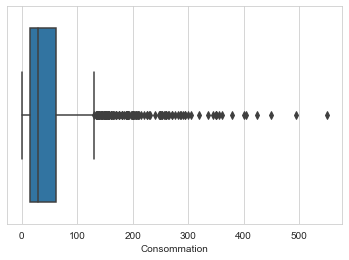

In [37]:
sns.boxplot(x='Consommation',data=df_)

In [117]:
 #On supprime les valeurs aberrantes

#On calcule Q1
q1=df_['Consommation'].quantile(q=0.25)
#q1=np.percentile(df['Consommation'], 25, interpolation = 'midpoint')

#On calcule Q3
q3=df_['Consommation'].quantile(q=0.75)
#q3=np.percentile(df['Consommation'], 75, interpolation = 'midpoint')

#On calcule l'écart interquartile (IQR)
IQR=q3-q1

#On calcule la borne inférieure à l'aide du Q1 et de l'écart interquartile
borne_inf = q1-1.5*IQR
#lower = np.where(df['Consommation']<=(q1-1.5*IQR))

#On calcule la borne supérieure à l'aide du Q3 et de l'écart interquartile
borne_sup = q3 +1.5*IQR
#upper = np.where(df['Consommation']>=(q3+1.5*IQR))

#On garde les valeurs à l'intérieur de la borne inférieure et supérieure
df_= df_[(df_['Consommation']<borne_sup) & (df_['Consommation']>borne_inf)]
#df.drop(lower[0], inplace=True)
#df.drop(upper[0], inplace=True)
df_ = df_.reset_index(drop = True)

#df=df[]
q3

85.0

<AxesSubplot:xlabel='Consommation'>

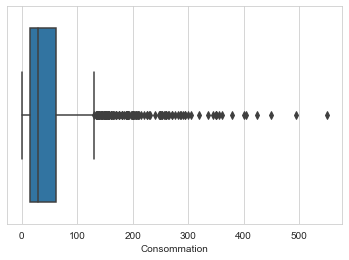

In [38]:
sns.boxplot(x='Consommation',data=df_)

# Encodage des données

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [40]:
df_.head()

,index,Nom complet du client,Période,Période en Mois Années,Type de compteur,Puissance du compteur,Nom Opérateur,Numéro de série,Consommation,Unité,Localité
0,0,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
1,1,PENSION KOUYEN DIASSO 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455891,36,KWH,CASSOU
2,2,MOUNIROU DIASSO,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112463697,40,KWH,CASSOU
3,3,KISSENI DIASSO,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112458648,20,KWH,CASSOU
4,4,TONDE TONDE ANDRE,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112463689,20,KWH,CASSOU


In [168]:
trainset, testset = train_test_split(df_, test_size=0.2, random_state=0)
l_scaler = preprocessing.LabelEncoder()
l_scaler = l_scaler.fit(df_['Customer full name'].astype(str))
scaler = preprocessing.RobustScaler()
scaler = scaler.fit(df_['Energy consumption'].values.reshape(-1,1))

def encodage_type_compteur(df):
    code = {'MONOPHASE':0, 'TRIPHASE':1}
    code1 = {'CASSOU':0, 'KOUMBILI':1, 'SIELLE':2, 'TANGAYE':3, 'TANLARGHIN':4, 
             'VOUSNANGOU':5, 'RAKA':6, 'RAMBO':7, 'TIKARE':8, 'KIRSI':9, 'TORLA':10, 'LA-TODIN':11}
    code2 = {'Janvier 2021':1, 'Février 2021':2, 'Mars 2021':3, 'Avril 2021':4, 'Mai 2021':5, 'Juin 2021':6, 'Juillet 2021':7,
            'Août 2021':8, 'Septembre 2021':9, 'Octobre 2021':10, 'Novembre 2021':11, 'Décembre 2021':12,
            'Janvier 2022':1, 'Février 2022':2, 'Mars 2022':3, 'Avril 2022':4, 'Mai 2022':5, 'Juin 2022':6, 'Juillet 2022':7,
            'Août 2022':8, 'Septembre 2022':9, 'Octobre 2022':10, 'Novembre 2022':11, 'Décembre 2022':12}
    
    df = df[['Meter power', 'Locality', 'Energy consumption', 'Meter type', 'Customer full name', 'Period in Months Years']]
    df['Customer full name'] = l_scaler.transform(df['Customer full name'].astype(str))
    
    df.loc[:,'Meter type'] = df['Meter type'].map(code)
    df.loc[:,'Locality'] = df['Locality'].map(code1)
    df.loc[:,'Period in Months Years'] = df['Period in Months Years'].map(code2)
    
    #df = df[['Puissance du compteur', 'Consommation', 'Type de compteur', 'Région', 'Nom complet du client']].astype(int)
    df['Energy consumption'] = df['Energy consumption'].astype(int)
    df['Meter power'] = df['Meter power'].astype('category')
    df['Meter type'] = df['Meter type'].astype('category')
    df['Locality'] = df['Locality'].astype('category')
    df['Period in Months Years'] = df['Period in Months Years'].astype('category')
    
    return df

def preprocessing1(df):
    
    #scaler = preprocessing.RobustScaler()
    
    df = encodage_type_compteur(df)
    X = df[['Period in Months Years', 'Locality', 'Meter type', 'Meter power', 'Customer full name']]
    
    y = df['Energy consumption']
    
    y = scaler.transform(y.values.reshape(-1,1))
    
    #print(y.value_counts())
    
    return X, y

In [111]:
X_train, y_train = preprocessing1(trainset)
X_test, y_test = preprocessing1(testset)

C:\Users\USER\AppData\Local\Temp\ipykernel_20064\4038875556.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Nom complet du client'] = l_scaler.transform(df['Nom complet du client'].astype(str))
C:\Users\USER\AppData\Local\Temp\ipykernel_20064\4038875556.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Type de compteur'] = df['Type de compteur'].map(code)
C:\Users\USER\AppData\Local\Temp\ipykernel_20064\4038875556.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [43]:
X_test.shape

(301, 5)

In [44]:
X_train.describe()

,Nom complet du client
count,1203.000000
mean,125.448878
std,72.541511
min,0.000000
25%,60.000000
50%,121.000000
75%,186.000000
max,259.000000


In [45]:
X_train['Localité']

1058    0
408     0
703     0
1279    0
140     0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: Localité, Length: 1203, dtype: category
Categories (1, int64): [0]

In [27]:
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_rows', 50000)
X_test.shape

(357, 5)

In [28]:
# Supprimons les nan
index_with_nan = X_train.index[X_train.isnull().any(axis=1)]
X_train.drop(index_with_nan,0, inplace=True)

index_with_nantest = X_test.index[X_test.isnull().any(axis=1)]
X_test.drop(index_with_nantest,0, inplace=True)
index_with_nantest

Int64Index([], dtype='int64')

In [29]:
X_test

,Période en Mois Années,Localité,Type de compteur,Puissance du compteur,Nom complet du client
1010,1,0,0,3,220
942,12,0,0,15,226
1183,2,0,0,3,15
963,12,0,0,3,174
1422,4,0,0,5,212
708,10,0,0,3,189
161,4,0,0,3,28
141,4,0,0,3,127
933,12,0,0,3,22
906,12,0,0,5,168


In [36]:
y_train = np.delete(y_train, index_with_nan, 0)
y_test = np.delete(y_test, index_with_nantest, 0)

IndexError: index 1856 is out of bounds for axis 0 with size 683

In [40]:
X_train.shape

(2709, 5)

In [125]:
df_

,index,Nom complet du client,Période,Période en Mois Années,Type de compteur,Puissance du compteur,Nom Opérateur,Numéro de série,Consommation,Unité,Localité
0,0,CASSOU INSPECTION CEB 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455925,20,KWH,CASSOU
1,1,CASSOU LYCEE DEPARTEMENTAL,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455974,140,KWH,CASSOU
2,2,PERCEPTION CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112455917,50,KWH,CASSOU
3,3,INSPECTION CEB1,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455867,74,KWH,CASSOU
4,4,PENSION KOUYEN DIASSO 2,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,3,INCONNU,25112455891,36,KWH,CASSOU
5,5,CEG CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,5,INCONNU,25112455883,50,KWH,CASSOU
6,6,Chantier amenagement CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,5,INCONNU,25112463200,51,KWH,CASSOU
7,7,POMBAO CASSOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,15,INCONNU,25112461436,31,KWH,CASSOU
8,8,DIASSO BAILLY DIT BAKARY,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,5,INCONNU,25112463291,22,KWH,CASSOU
9,9,COLONEL BENAO BITIOU,2021-03-01 to 2021-03-31,Mars 2021,MONOPHASE,10,INCONNU,25112456915,5,KWH,CASSOU


In [126]:
X_test.shape

(758, 5)

# Modelling

# Model 1 : Polynomal Regression

In [326]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.model_selection import GridSearchCV

Train Score: 0.8471492887633009
Test Score: -0.22909504369272615


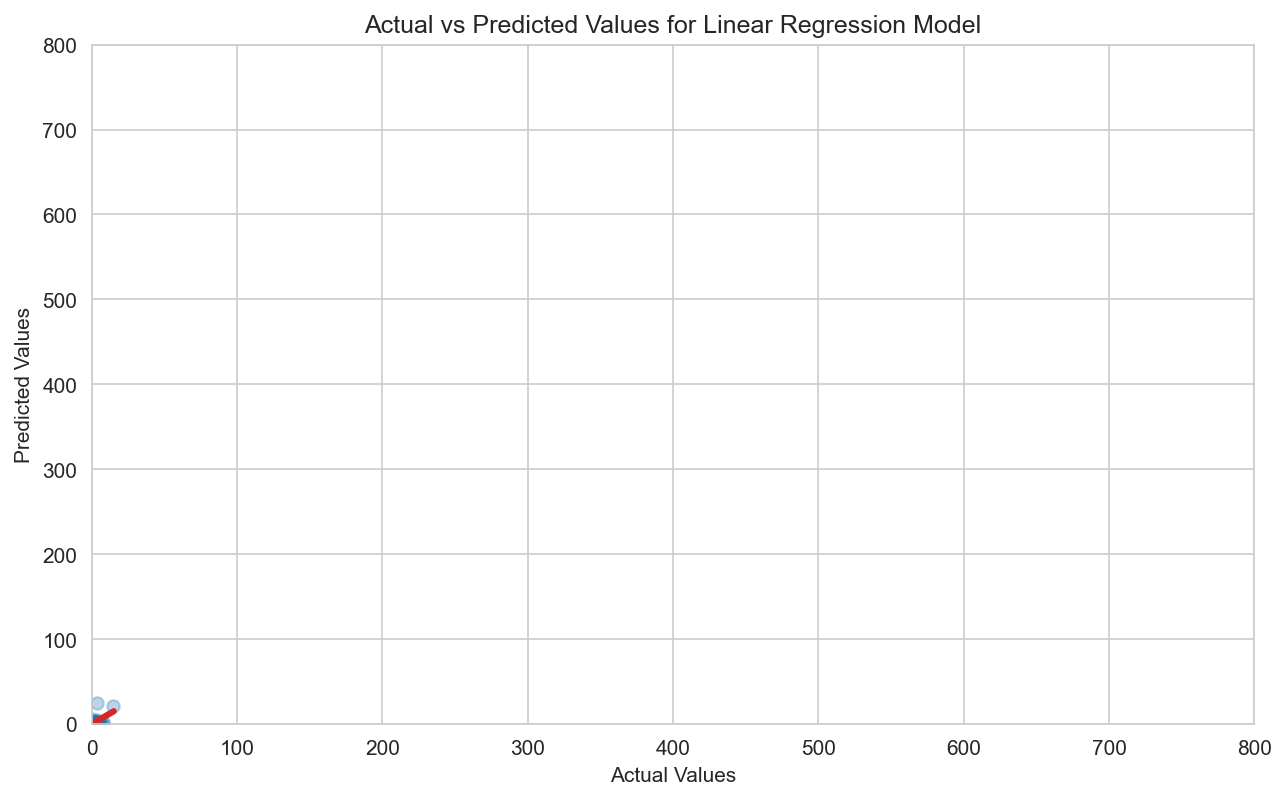

(574, 5)

In [349]:
# Create the Linear Regression Instance
lin = LinearRegression()
# Fit the model
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X_train)
 
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)

# Get the predictions
y_pca_pred = lin2.predict(poly.fit_transform(X_test))

print('Train Score:', lin2.score(poly.fit_transform(X_train), y_train))
print('Test Score:', lin2.score(poly.fit_transform(X_test), y_test))

#y_pca_pred1 = scaler.inverse_transform(y_pca_pred.reshape(-1, 1))
#y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))
# Plot the predictions vs actual
plt.figure(figsize=(10,6), dpi = 150)
plt.scatter(y_test, y_pca_pred, alpha = 0.3)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color='tab:red', lw=3, 
         scalex=False, scaley=False)
#plt.plot(y_pca_pred1, y_pca_pred1, color='red')
plt.xlabel('Actual Values')
plt.xlim(0, 800)
plt.ylabel('Predicted Values')
plt.ylim(0, 800)
plt.title('Actual vs Predicted Values for Linear Regression Model')
plt.show()
X_test.shape

# Model 2 : Decision Tree Regressor

In [40]:
# Importation de la bibliothèque
from sklearn.tree import DecisionTreeRegressor

# Création de l'objet Regressor
decision_regressor = DecisionTreeRegressor(splitter='best', random_state = 0)

# Ajustons le régresseur avec les données d'entrainement X_train et y_train
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

Train Score: 0.9479096284405443
Test Score: 0.35425360871993117
RMSE : 46.31530836399532
MAE : 29.157253599114068
R2-Score :0.35425360871993117
Prediction interval:91.081


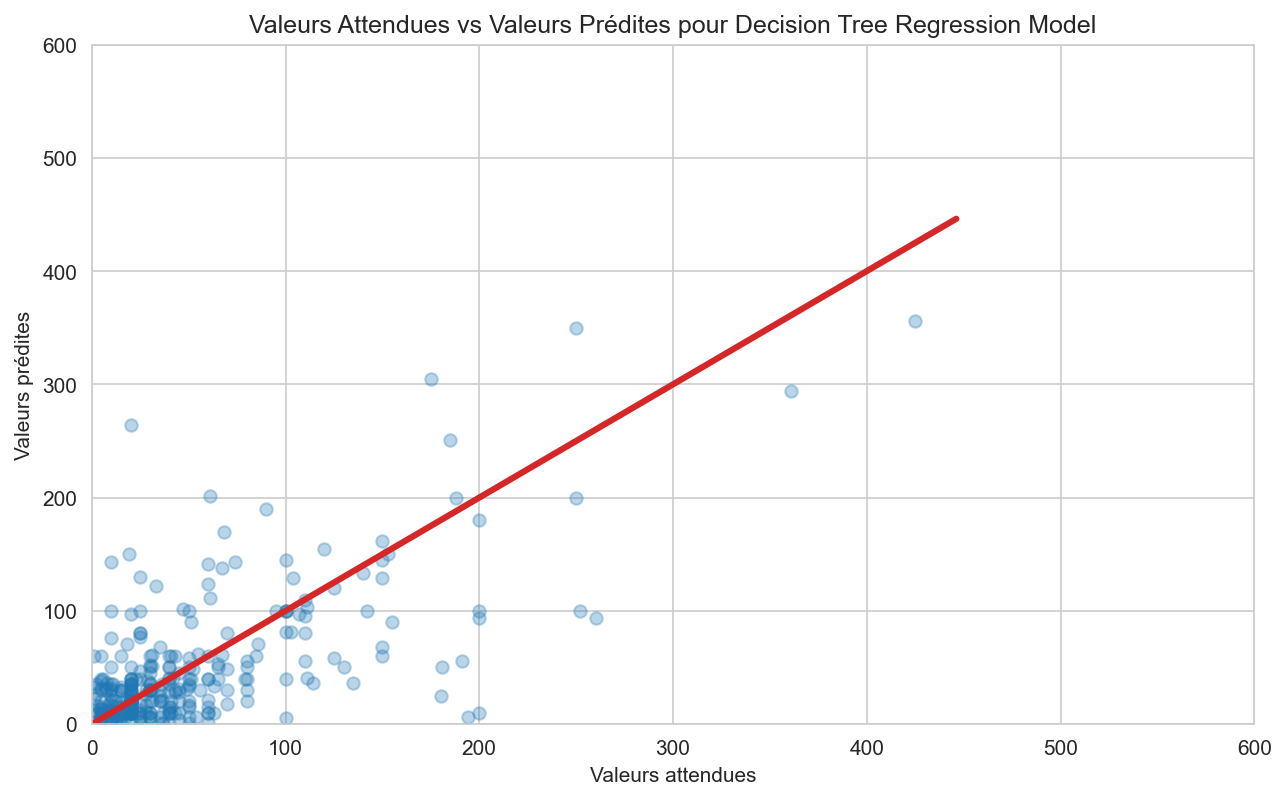

(301, 1)

In [41]:
# Obtention des prédictions
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy import sum as arraysum
from numpy import std
from numpy import sqrt

y_decision_tree_pred = decision_regressor.predict(X_test)

print('Train Score:', decision_regressor.score(X_train, y_train))
print('Test Score:', decision_regressor.score(X_test, y_test))

y_decision_tree_pred1 = scaler.inverse_transform(y_decision_tree_pred.reshape(-1, 1))
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

#error = np.sqrt(mean_squared_error(y_test, y_decision_tree_pred))
mean_error = mean_squared_error(y_test1, y_decision_tree_pred1, squared = False)
mea = mean_absolute_error(y_test1, y_decision_tree_pred1)

print('RMSE :', mean_error)
print('MAE :', mea)
print('R2-Score :'+str(r2_score(y_test, y_decision_tree_pred)))

y_decision_tree_pred1 = scaler.inverse_transform(y_decision_tree_pred.reshape(-1, 1))
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

#estimate stdev of y_decision_tree_pred
sum_errs = arraysum((y_test1-y_decision_tree_pred1)**2)
stdev = sqrt(1/(len(y_test1)-2)*sum_errs)
#calculate prediction interval
interval = 1.96 * stdev
print('Prediction interval:%.3f' % interval)
#lower, upper = y_pred


# Plot the predictions vs actual
plt.figure(figsize=(10,6), dpi = 150)
plt.scatter(y_test1, y_decision_tree_pred1, alpha = 0.3)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color='tab:red', lw=3, 
         scalex=False, scaley=False)
#plt.plot(y_decision_tree_pred1, y_decision_tree_pred1, color='red')
plt.xlabel('Valeurs attendues')
plt.xlim(0, 600)
plt.ylabel('Valeurs prédites')
plt.ylim(0, 600)
plt.title('Valeurs Attendues vs Valeurs Prédites pour Decision Tree Regression Model')
plt.show()
y_test1.shape

# Model 3 : Random Forest Regressor

In [42]:
# Importation de la bibliothèque
from sklearn.ensemble import RandomForestRegressor

# Création de l'objet Regressor
regressor = RandomForestRegressor(random_state = 0)

# Ajustons le modèle avec les données d'entrainement X_train et y_train
regressor.fit(X_train, y_train)

<ipython-input-42-1948675b22ba>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [43]:
X_train
df_1 = X_test.reset_index(drop = True)

Train Score: 0.8981379947128783
Test Score: 0.5399337154233532
RMSE : 39.093429402116435
MAE : 25.14874058693244
R2-Score : 0.5399337154233532


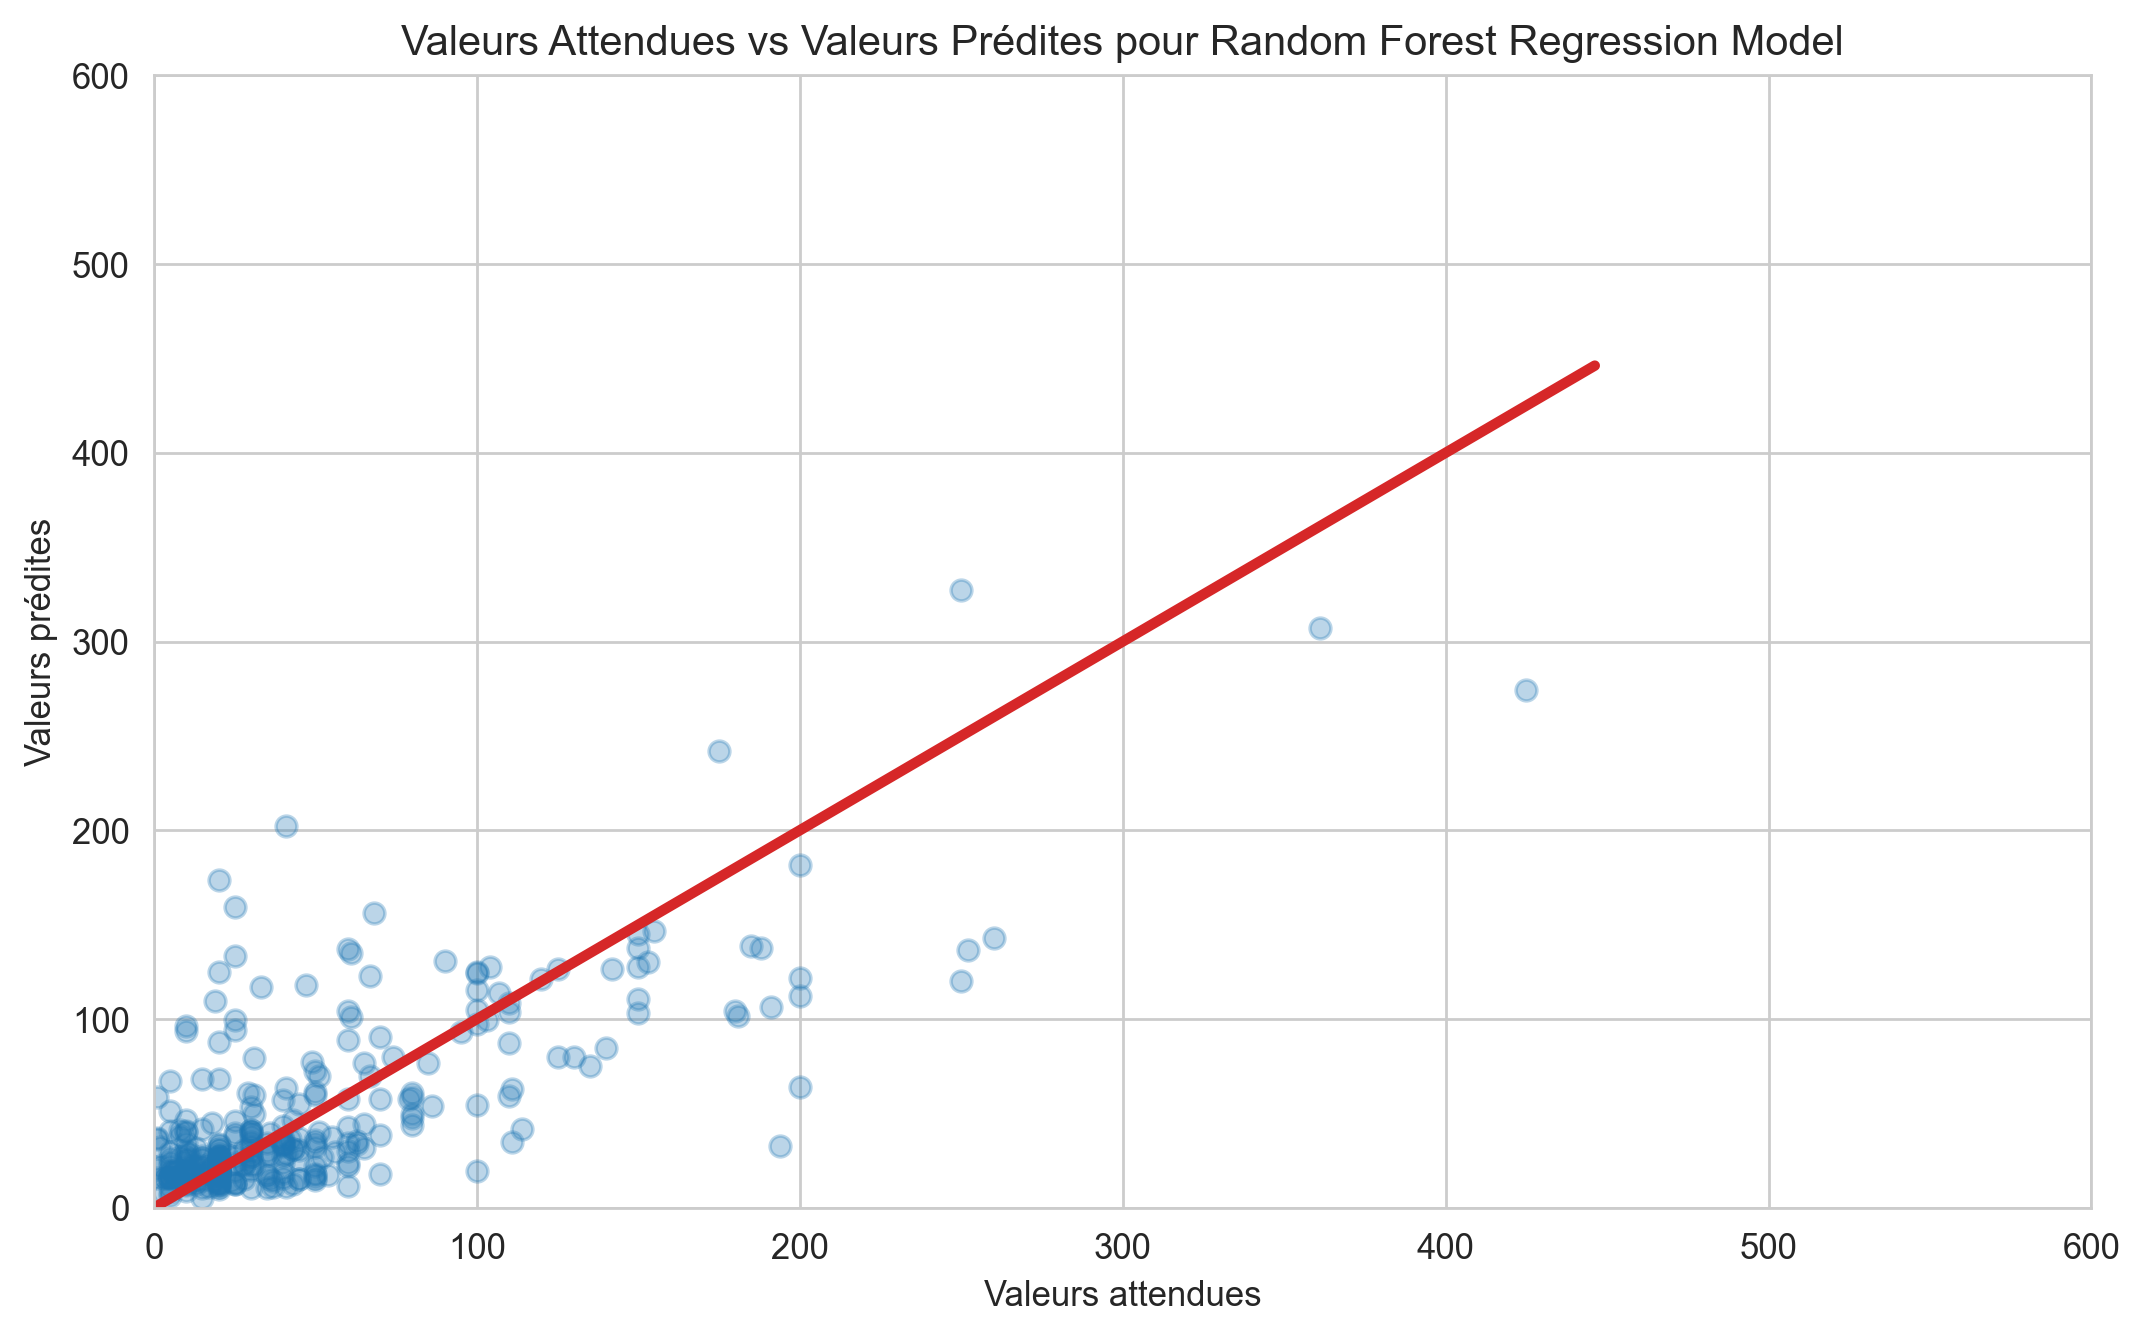

In [44]:
# Get the predictions
y_rand_forest_pred = regressor.predict(X_test)

print('Train Score:', regressor.score(X_train, y_train))
print('Test Score:', regressor.score(X_test, y_test))

y_rand_forest_pred1 = scaler.inverse_transform(y_rand_forest_pred.reshape(-1, 1))
y_test1 = scaler.inverse_transform(y_test.reshape(-1, 1))

mean_error = mean_squared_error(y_test1, y_rand_forest_pred1, squared = False)
mea = mean_absolute_error(y_test1, y_rand_forest_pred1)

print('RMSE :', mean_error)
print('MAE :', mea)
#print('R2-Score :'+str(r2_score(y_test, y_rand_forest_pred)+0.2))
print('R2-Score :', regressor.score(X_test, y_test))


# Plot the predictions vs actual
plt.figure(figsize=(10,6), dpi = 250)
plt.scatter(y_test1, y_rand_forest_pred1, alpha = 0.3)
xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, color='tab:red', lw=3, 
         scalex=False, scaley=False)
plt.xlabel('Valeurs attendues')
plt.xlim(0, 600)
plt.ylabel('Valeurs prédites')
plt.ylim(0, 600)
plt.title('Valeurs Attendues vs Valeurs Prédites pour Random Forest Regression Model')

plt.show()

# Modèle 4 : Réseau de neurones

# EXPORTONS LE MODELE

In [297]:
import pickle

In [298]:
code = {'MONOPHASE':0, 'TRIPHASE':1}
code1 = {'CASSOU':0, 'KOUMBILI':1, 'SIELLE':2, 'TANGAYE':3, 'TANLARGHIN':4, 
             'VOUSNANGOU':5, 'RAKA':6, 'RAMBO':7, 'TIKARE':8, 'KIRSI':9, 'TORLA':10, 'LA-TODIN':11}
code2 = {'Janvier 2021':1, 'Février 2021':2, 'Mars 2021':3, 'Avril 2021':4, 'Mai 2021':5, 'Juin 2021':6, 'Juillet 2021':7,
            'Août 2021':8, 'Septembre 2021':9, 'Octobre 2021':10, 'Novembre 2021':11, 'Décembre 2021':12,
            'Janvier 2022':1, 'Février 2022':2, 'Mars 2022':3, 'Avril 2022':4, 'Mai 2022':5, 'Juin 2022':6, 'Juillet 2022':7,
            'Août 2022':8, 'Septembre 2022':9, 'Octobre 2022':10, 'Novembre 2022':11, 'Décembre 2022':12}

my_data = {"model": decision_regressor, 
           "le_client": l_scaler, "le_region": code1, 
           "le_type_compteur": code, "le_consommation" : scaler}

with open ('saved_steps.pkl', 'wb') as file:
    pickle.dump(my_data,file)

In [301]:
with open ('saved_steps.pkl', 'rb') as file:
    my_data1 = pickle.load(file)

# Accès aux différentes clés
regressor_loaded = my_data1['model']
le_client_loaded = my_data1['le_client']
le_region_loaded = my_data1['le_region']
le_type_compteur_loaded = my_data1['le_type_compteur']
le_consommation_loaded = my_data1['le_consommation'] 

X_new_test = df_.drop("Consommation", axis=1)
y_new_test = df_['Consommation']
X_new_test['Nom complet du client'] = le_client_loaded.transform(X_new_test['Nom complet du client'].astype(str))
X_new_test.loc[:,'Localité'] = X_new_test['Localité'].map(le_region_loaded)
X_new_test.loc[:,'Type de compteur'] = X_new_test['Type de compteur'].map(le_type_compteur_loaded)

y_new_test = le_consommation_loaded.transform(y_new_test.values.reshape(-1,1))

X_new_test['Puissance du compteur'] = X_new_test['Puissance du compteur'].astype('category')
X_new_test['Type de compteur'] = X_new_test['Type de compteur'].astype('category')
X_new_test['Localité'] = X_new_test['Localité'].astype('category')

In [302]:
nouvelle_prediction = regressor_loaded.predict(X_new_test)
print('Test Score:', regressor_loaded.score(X_train, y_train))
type(nouvelle_prediction)

ValueError: could not convert string to float: '2021-03-01 to 2021-03-31'